In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("ola.csv")

In [3]:
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213


In [4]:
df.dtypes

datetime       object
season          int64
weather         int64
temp          float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [5]:
df.isnull().sum()

datetime      0
season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

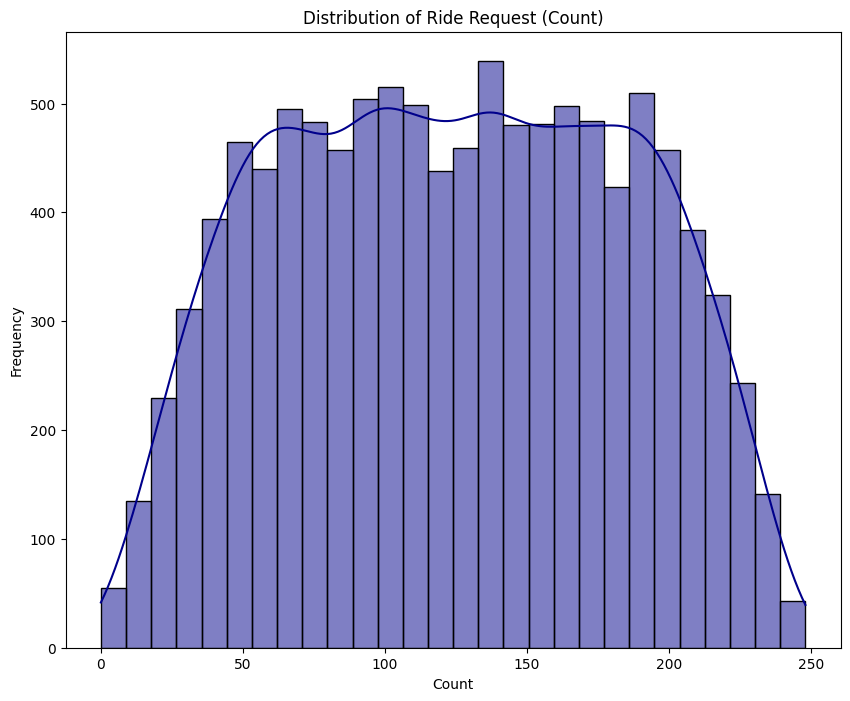

In [7]:
plt.figure(figsize=(10,8))
sns.histplot(df['count'], kde=True, color='darkblue')
plt.title("Distribution of Ride Request (Count)")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

/var/folders/7r/brf3gwy100d423nr9bf5ctw00000gn/T/ipykernel_20792/2616581333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=df, palette="bright")


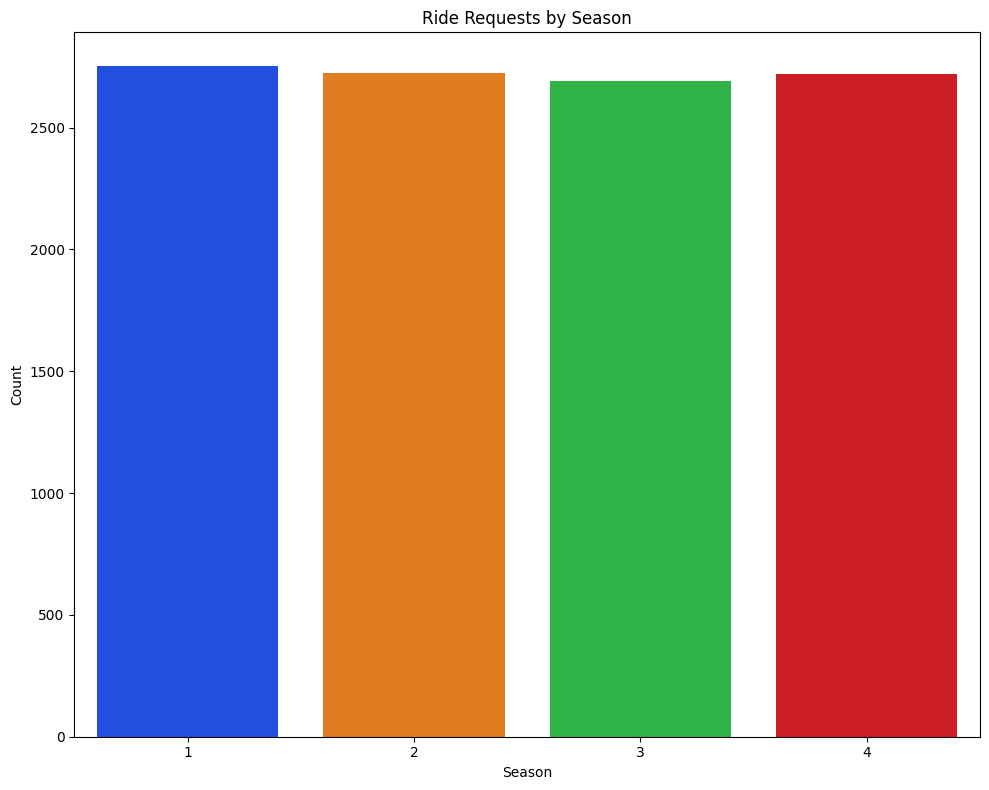

In [8]:
plt.figure(figsize=(10, 8))
sns.countplot(x='season', data=df, palette="bright")
plt.title("Ride Requests by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/var/folders/7r/brf3gwy100d423nr9bf5ctw00000gn/T/ipykernel_20792/953229984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='temp', y='count', data=df, palette='bright')


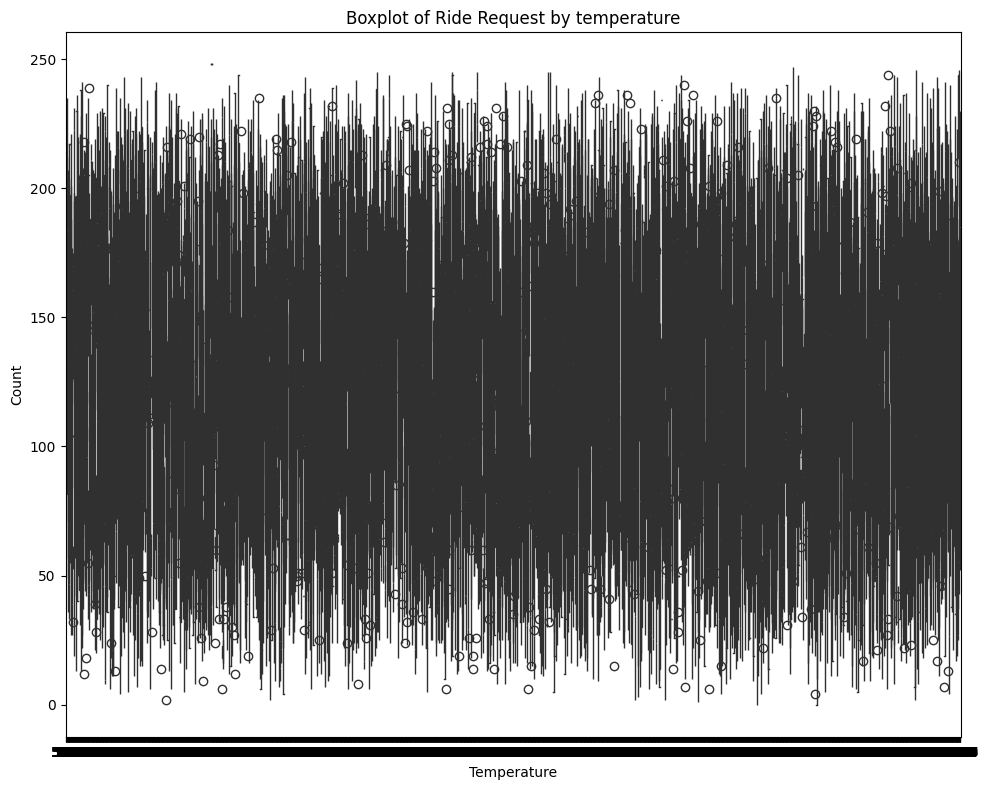

In [9]:
plt.figure(figsize=(10,8))
sns.boxplot(x='temp', y='count', data=df, palette='bright')
plt.title("Boxplot of Ride Request by temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

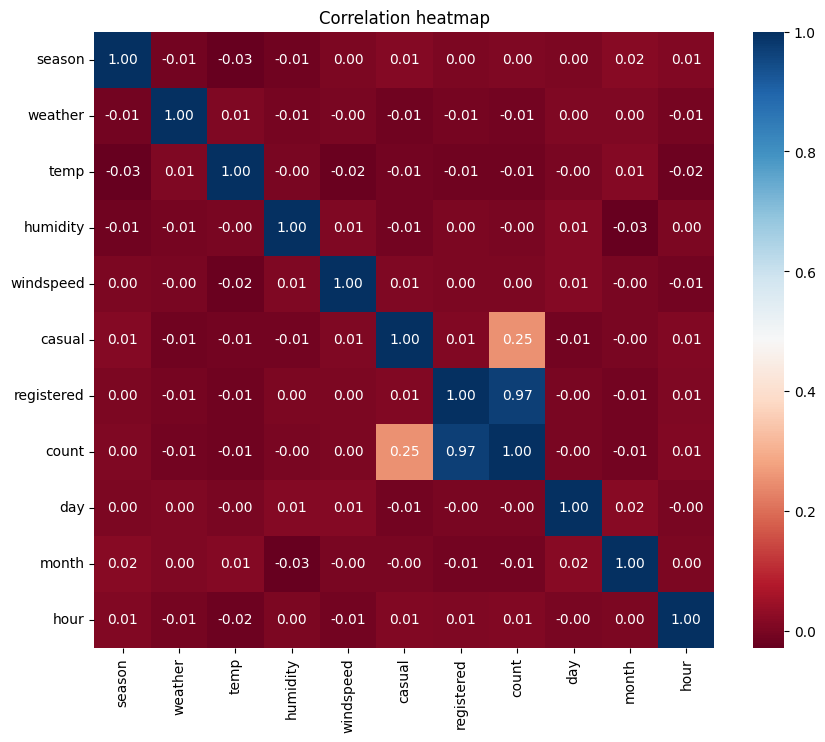

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu')
    plt.title("Correlation heatmap")
    plt.show()

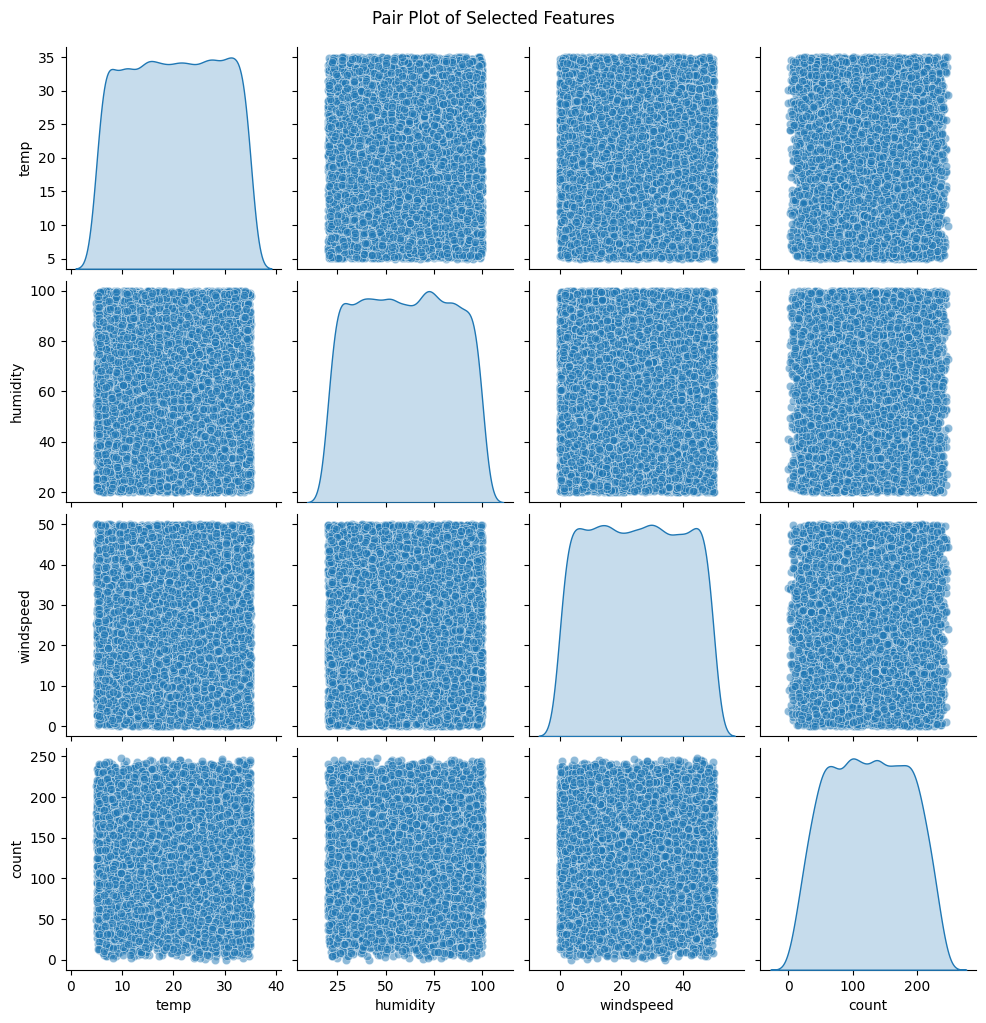

In [11]:
cols_to_plot = ['temp', 'humidity', 'windspeed', 'count']
sns.pairplot(df[cols_to_plot], diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

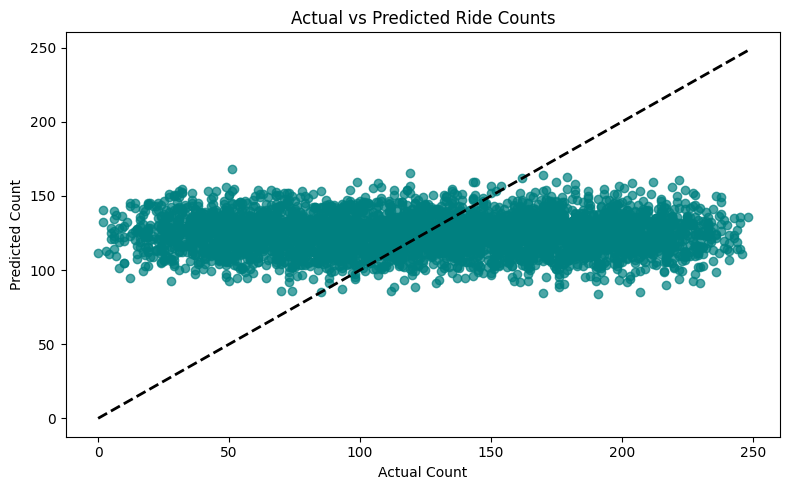

Prediction Analysis Results:
Mean Squared Error (MSE): 3601.89
R-squared Score: -0.05


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['season', 'weather', 'temp', 'humidity', 'windspeed', 'hour', 'day', 'month']
target = 'count'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.title('Actual vs Predicted Ride Counts')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()
print('Prediction Analysis Results:')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')